# Đọc và quan sát tập dữ liệu

In [1]:
#Khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Đọc dữ liệu từ file
data = pd.read_csv('../Crawl/Data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12863 entries, 0 to 12862
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Danh mục  12863 non-null  object
 1   Nội dung  12844 non-null  object
dtypes: object(2)
memory usage: 201.1+ KB


In [4]:
#Hiển thị 10 dòng dữ liệu ngẫu nhiên
data.sample(10)

,Danh mục,Nội dung
1983,Giáo dục,Mặt bằng điểm chuẩn năm nay giảm không nằm ngo...
1210,Công nghệ,"Theo TechSpot, Google vừa phát hành thêm phiên..."
4356,Công nghệ,Samsung được cho là đang phát triển ứng dụng t...
4941,Xe,Khi chuyển từ nhập khẩu nguyên chiếc sang lắp ...
1563,Sức khỏe,Đột quỵ xảy ra khi dòng máu đến não bị ngừng l...
5456,Sức khỏe,Sau đây là những lợi ích nổi bật của lá đu đủ....
5103,Thế giới,Trong cuộc họp hội đồng giáo dục học khu TP.Tu...
1986,Văn hóa,"Chỉ thị lịch sử\nCụ thể, sau ngày Nhật đảo chí..."
6936,Văn hóa,Đó cũng chính là nơi đáng sống và là mong ước ...
11788,Kinh tế,"Ngày 16.5, tại H.An Biên (Kiên Giang), Bộ NN-P..."


In [5]:
#Kiểm tra dữ liệu null trong tập dữ liệu
print('Kiểm tra dữ liệu null trong tập dữ liệu:')
print(data.isnull().sum())

Kiểm tra dữ liệu null trong tập dữ liệu:
Danh mục     0
Nội dung    19
dtype: int64


In [6]:
#Xử lý dữ liệu null bằng cách xoá
data = data.dropna()
#Kiểm tra dữ liệu null sau khi xử lý
data.isnull().sum()

Danh mục    0
Nội dung    0
dtype: int64

In [7]:
#Quan sát dữ liệu
print('Thống kê dữ liệu:')
print(data.count())
print('-'*50)
print('Thống kê số lượng nội dung theo từng lớp:')
print(data['Danh mục'].value_counts())

Thống kê dữ liệu:
Danh mục    12844
Nội dung    12844
dtype: int64
--------------------------------------------------
Thống kê số lượng nội dung theo từng lớp:
Danh mục
Thời sự      1002
Đời sống     1001
Thể thao     1001
Thế giới     1000
Sức khỏe     1000
Giới trẻ     1000
Giáo dục     1000
Văn hóa      1000
Công nghệ     999
Du lịch       994
Xe            982
Kinh tế       934
Giải trí      931
Name: count, dtype: int64


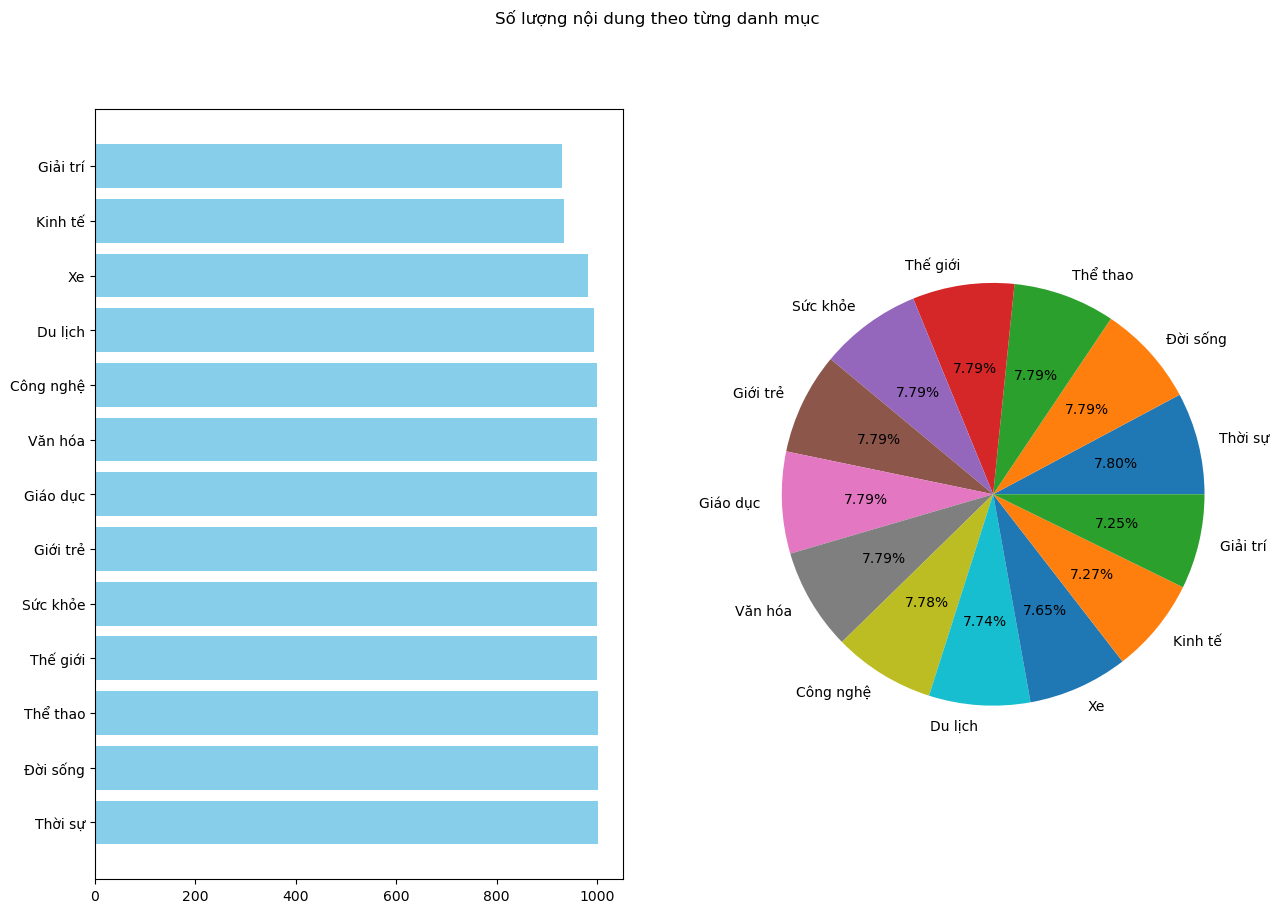

In [25]:
#Trực quan hoá dữ liệu đầu vào
tong_danhmuc = data['Danh mục'].value_counts()
plt.figure(figsize=(15, 10))
plt.suptitle('Số lượng nội dung theo từng danh mục')
# Tạo biểu đồ cột
plt.subplot(1,2,1)
plt.barh(tong_danhmuc.index, 
         tong_danhmuc.values, 
         color='skyblue')
# Tạo biểu đồ tròn
plt.subplot(1,2,2)
plt.pie(tong_danhmuc,
        labels = tong_danhmuc.index,
        autopct = '%.2f%%')
plt.show()

# Tiền xử lý

## a) Làm sạch dữ liệu

In [26]:
import re
#Hàm xử làmn sạch dữ liệu
def clean_noise(st):
    # Chuyển về chữ thường
    text = st.lower()
    # Loại bỏ các email
    text = re.sub(r'\b\w+@\w+\.\w+\b', '', text)
    # Loại bỏ các link
    text = re.sub(r'http\S+|www\.\S+', '', text)
    # Xóa các ký tự đặc biệt
    text = re.sub(r'[^\w\s]', '', text)
    # Xóa các chữ số
    text = re.sub(r'\d+', '', text)
    # Loại bỏ các ký tự xuống dòng (newlines)
    text = re.sub(r'\n|\r', ' ', text)  
    return text

## b) Tách từ và Loại bỏ stopword

In [27]:
#Dùng thư viện underthesea để tách từ
import underthesea 
#Hàm tách từ
def tokenize(text):
    tokens = underthesea.word_tokenize(text)
    return tokens

In [28]:
#Đọc file stopwords
with open('vietnamese-stopwords.txt', "r", encoding="utf-8") as file:
    lines = file.readlines()

stopwords = []
#Duyệt từng dòng trong file
for line in lines:
    word = line.strip()  # Loại bỏ khoảng trắng đầu/cuối
    stopwords.append(word)

#Hàm loại bỏ stopword
def remove_stopword(tokens):
    final_tokens = [token for token in tokens if token not in stopwords]
    return final_tokens

## c) Tiền xử lý với các hàm đã xây dựng

In [29]:
#Gộp các hàm xử lý dữ liệu
def preprocess(text):
    text = clean_noise(text) #Loại bỏ noise
    tokens = tokenize(text) #Tách từ
    final_tokens = remove_stopword(tokens) #Loại bỏ stopword
    # Kết hợp các từ còn lại thành một chuỗi
    final_text = ' '.join(final_tokens)
    return final_text

In [30]:
#Lấy dòng đầu tiên trong dữ liệu
test_text = data['Nội dung'].iloc[0]

In [31]:
#Thử tiền xử lý dòng đầu
print('raw text: ',test_text)
print('-'*50)
print('new text: ',preprocess(test_text))

raw text:  Ngày 1.9, tin từ Công an tỉnh Hậu Giang cho biết, Cơ quan CSĐT Công an H.Châu Thành A vừa khởi tố vụ án, khởi tố bị can, ra lệnh bắt tạm giam đối với Đ.T.D (29 tuổi), L.V.V.L (22 tuổi), N.T.V (19 tuổi) và lệnh cấm đi khỏi nơi cư trú đối với N.T.P (16 tuổi, cùng ở H.Châu Thành A), để điều tra về tội cố ý gây thương tích. Đây là 4 nghi phạm trong vụ án mang hung khí chém người gây thương tích 44%.Nhóm 4 thanh thiếu niên cùng tang vật gây ánẢNH: THANH DUYTheo điều tra ban đầu, khoảng 19 giờ 10 ngày 23.8, Công an TT.Rạch Gòi (H.Châu Thành A) nhận được tin báo của người dân có 4 thanh niên đi trên xe mô tô, mang theo hung khí rượt đuổi, chém 2 người gây thương tích trên quốc lộ 61 (đoạn thuộc ấp Thị Tứ, TT.Rạch Gòi), rồi lên xe tẩu thoát khỏi hiện trường.Ngay sau đó, Cơ quan CSĐT Công an H.Châu Thành A phối hợp với Công an TT.Rạch Gòi và các đơn vị liên quan, khẩn trương triển khai các biện pháp nghiệp vụ, xác minh, truy bắt nóng các nghi phạm. Sau gần 2 ngày, lực lượng công an đ

In [32]:
#Xử lý toàn bộ dữ liệu
content = data['Nội dung'].apply(preprocess)

In [33]:
#Tạo nhãn tương ứng 
label=data['Danh mục']

## d) Lưu dữ liệu đã xử lý
---

Sau khi tiền xử lý dữ liệu, một số nội dung bị xoá toàn bộ các noise và trở thành các nội dung rỗng. Thực hiện loại bỏ các nội dung này khỏi tập dữ liệu

In [37]:
#Kiểm tra lại dữ liệu có null không
content.isnull().sum()
#Tiến hành loại bỏ dữ liệu null
content = content.dropna()

In [150]:
#Chuyển dữ liệu đã xử lý thành dataframe
data_preprocessed = pd.DataFrame({'content': content, 'label': label})
data_preprocessed.sample(10)

,content,label
8852,cơ phó anju khatiwada chụp màn hình the nation...,Thế giới
882,học sinh trường thpt bùi thị xuân q tphcm vui ...,Giáo dục
1828,chiều ngô văn cương bí thư tư đoàn đoàn công t...,Giới trẻ
12214,vai gái thành thị thăm quê kha ly hào hứng dịp...,Giải trí
7267,công an tpvũng tàu rịavũng tàu phối hợp viện k...,Thời sự
6965,ấn phẩm đằng mặt báo hồi ký chân dung báo chí ...,Văn hóa
9507,pv thanh niên cơ quan csđt công an tphcm hoàn ...,Thời sự
7129,hồ tấn minh chánh văn phòng sở gdđt tphcm thôn...,Giáo dục
3530,tọa đàm tham gia chuyên gia công ty vi mạch bá...,Giáo dục
10533,ngập tuyến đường họp báo vũ văn điệp giám đốc ...,Kinh tế


In [151]:
#Lưu dữ liệu đã xử lý thành file csv
data_preprocessed.to_csv('data_ok.csv', index=False)

# Chuẩn bị dữ liệu cho trích chọn đặc trưng

In [6]:
#Đọc dữ liệu đã xử lý
data_finish = pd.read_csv('data_ok.csv')
data_finish.sample(10)

,content,label
12836,sở du lịch hiệp hội du lịch tphcm tổ chức họp ...,Du lịch
2381,techspot thị trường công nghệ chứng kiến xếp h...,Công nghệ
9766,làm việc bộ trưởng tô lâm hành vi gây rối đốt ...,Thời sự
2138,thất bại ra mắt hlv arne slot tung đội hình xu...,Thể thao
7343,chuyên gia dự báo james bond no time to die f ...,Văn hóa
11247,trao đổi thanh niên ngày trước thông tin metro...,Kinh tế
2887,kéo dài quyền lợi người dân treo cơ quan thẩm ...,Kinh tế
11171,tết nguyên đán tết sài gòn ảnh hưởng nặng nề d...,Đời sống
5404,truyền thông địa phương tiết lộ danh tính đàn ...,Sức khỏe
11029,báo cáo điện lực kiểm tra điện khách hàng điện...,Kinh tế


In [7]:
data_finish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  12844 non-null  object
 1   label    12844 non-null  object
dtypes: object(2)
memory usage: 200.8+ KB


In [8]:
#Tách dữ liệu thành tập train và test
from sklearn.model_selection import train_test_split
#Tách dữ liệu thành tập train và test (tỷ lệ 80-20)
X_train, X_test, y_train, y_test = train_test_split(data_finish['content'], 
                                                    data_finish['label'],
                                                    test_size=0.2, 
                                                    random_state=42)
# Kiểm tra kích thước của mỗi tập
print("Kích thước tập huấn luyện:", len(X_train))
print("Kích thước tập kiểm tra:", len(X_test))

Kích thước tập huấn luyện: 10275
Kích thước tập kiểm tra: 2569


# Tính đặc trưng theo TF-IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Chuyển dổi dữ liệu văn bản thành dạng vector bằng TF-IDF
vector = TfidfVectorizer(analyzer = 'word', max_features=15000)
X_train_tfidf = vector.fit_transform(X_train)
X_test_tfidf = vector.transform(X_test)

In [10]:
print("Tập huấn luyện:", X_train_tfidf.shape)
print("Tập kiểm tra:", X_test_tfidf.shape)

Tập huấn luyện: (10275, 15000)
Tập kiểm tra: (2569, 15000)


In [11]:
from sklearn import preprocessing
# Mã hóa nhãn mục tiêu
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [12]:
#Nhãn ban đầu
bandau = encoder.classes_
dachuyen = encoder.transform(encoder.classes_)
# In nhãn gốc và nhãn đã mã hóa tương ứng
for bd, dc in zip(bandau, dachuyen):
    print(f"Nhãn ban đầu: {bd} - Nhãn đã mã hóa: {dc}")

Nhãn ban đầu: Công nghệ - Nhãn đã mã hóa: 0
Nhãn ban đầu: Du lịch - Nhãn đã mã hóa: 1
Nhãn ban đầu: Giáo dục - Nhãn đã mã hóa: 2
Nhãn ban đầu: Giải trí - Nhãn đã mã hóa: 3
Nhãn ban đầu: Giới trẻ - Nhãn đã mã hóa: 4
Nhãn ban đầu: Kinh tế - Nhãn đã mã hóa: 5
Nhãn ban đầu: Sức khỏe - Nhãn đã mã hóa: 6
Nhãn ban đầu: Thế giới - Nhãn đã mã hóa: 7
Nhãn ban đầu: Thể thao - Nhãn đã mã hóa: 8
Nhãn ban đầu: Thời sự - Nhãn đã mã hóa: 9
Nhãn ban đầu: Văn hóa - Nhãn đã mã hóa: 10
Nhãn ban đầu: Xe - Nhãn đã mã hóa: 11
Nhãn ban đầu: Đời sống - Nhãn đã mã hóa: 12


# Huấn luyện mô hình với Naive Bayes

In [13]:
from sklearn import naive_bayes

# Khởi tạo mô hình MultinomialNB
model = naive_bayes.MultinomialNB()

### Dùng GridSearchCV tìm kiếm tham số alpha phù hợp nhất cho tập dữ liệu

In [14]:
from sklearn.model_selection import GridSearchCV

# Định nghĩa các tham số cần tìm kiếm trong GridSearchCV
param_grid = {
    'alpha': [0.1, 0.2, 0.4, 0.5, 0.7, 1.0]  # thử nghiệm các giá trị khác nhau của alpha
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)

# Huấn luyện GridSearchCV trên tập huấn luyện
grid_search.fit(X_train_tfidf, y_train)

# Lấy mô hình tốt nhất từ GridSearchCV
best_model = grid_search.best_estimator_

# Đánh giá độ chính xác của mô hình trên tập kiểm tra
acc_best_model = round(best_model.score(X_test_tfidf, y_test) * 100, 2)

print('Độ chính xác của mô hình tốt nhất: ', acc_best_model, '%')
print('Thông số tối ưu:', grid_search.best_params_)


Độ chính xác của mô hình tốt nhất:  81.47 %
Thông số tối ưu: {'alpha': 0.1}


In [15]:
#Khởi tạo mô hình với tham số tốt nhất
model = naive_bayes.MultinomialNB(alpha=0.1)
#Huấn luyện mô hình với tập huấn luyện
model.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=0.1)

# Đánh giá độ chính xác của Model trên tập train và test

In [16]:
#Độ chính xác của Model trên tập Huấn luyện(Train)
acc_train = model.score(X_train_tfidf,y_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

Độ chính xác trên tập huấn luyện: 87.53


In [17]:
from sklearn import metrics
#Dự đoán
y_test_pred = np.around(model.predict(X_test_tfidf))
#Đánh giá tập kiểm thử
print(metrics.classification_report(y_test,
                                    y_test_pred,
                                    target_names=encoder.classes_))

              precision    recall  f1-score   support

   Công nghệ       0.98      0.90      0.94       193
     Du lịch       0.79      0.83      0.81       201
    Giáo dục       0.86      0.88      0.87       203
    Giải trí       0.79      0.96      0.87       187
    Giới trẻ       0.64      0.59      0.61       200
     Kinh tế       0.77      0.79      0.78       174
    Sức khỏe       0.91      0.95      0.93       223
    Thế giới       0.87      0.81      0.84       197
    Thể thao       1.00      0.97      0.98       209
     Thời sự       0.66      0.75      0.70       182
     Văn hóa       0.77      0.60      0.67       193
          Xe       0.99      0.97      0.98       197
    Đời sống       0.56      0.57      0.57       210

    accuracy                           0.81      2569
   macro avg       0.81      0.81      0.81      2569
weighted avg       0.82      0.81      0.81      2569



**Nhận xét**

 - Mô hình đạt độ chính xác 87.53% trên tập huấn luyện, cho thấy khả năng học tốt từ dữ liệu. Về độ chính xác trên tập kiểm thử, mô hình có độ chính xác là 81.47%. 
- Các lớp công nghệ, thể thao, sức khỏe, giáo dục, xe đạt hiệu suất cao với precision, recall, F1-score giao động từ 0.86 đến 1.0. 
- Các lớp du lịch, thế giới, kinh tế, giải trí, thời sự đạt mức trung bình với precision, recall, F1-score giao động từ 0.66 đến 0.87, tuy có một số nhầm lẫn nhưng không quá nghiêm trọng. 
- Các lớp giới trẻ, đời sống, văn hóa có hiệu suất khá thấp, đặc biệt là đời sống với precision, recall, F1-score lần lượt là 0.56, 0.57, 0.57. Precision bằng 0.56, nghĩa là mô hình dự đoán là ‘Đời sống’ đúng khoảng 56%, Recall bằng 0.57, nghĩa là mô hình chỉ phát hiện được khoảng 57% thực sự là ‘Đời sống’. Điểm F1-Score cho ta thấy bộ phân loại trung bình.
- Macro avg là trung bình của các giá trị precision, recall, F1-score của tất cả các lớp. Trong trường hợp này, kết quả đều là 0.81.
- Weighted avg có nghĩa là mỗi lớp được coi trọng dựa trên tỷ lệ số lượng mẫu của lớp đó so với tổng số lượng mẫu. Các lớp có số lượng mẫu lớn hơn sẽ có trọng số lớn hơn trong tính toán. Trong trường hợp này, kết quả lần lượt là 0.82, 0.81, 0.81. 
- Trong kết quả, Macro avg và weighted avg khá đồng đều, điều này nghĩa là sự không cân bằng trong số lượng mẫu giữa các lớp không ảnh hưởng đáng kể đến giá trị trung bình của các số liệu đánh giá hiệu suất của mô hình.


### Ma trận Confusion Matrix trên tập Test

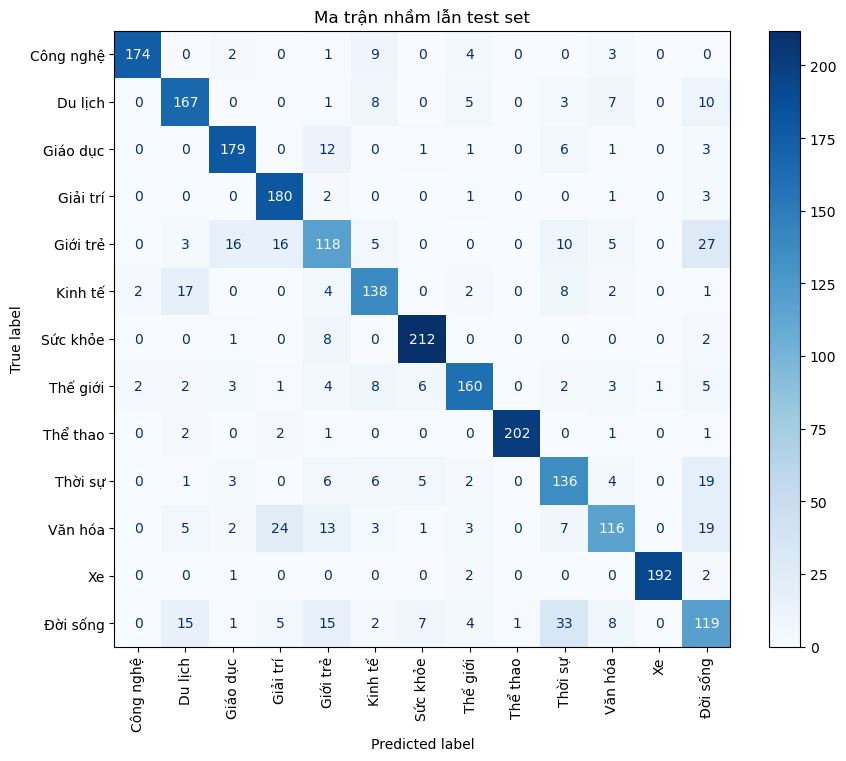

In [242]:
#Import thư viện
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Tính toán ma trận:
cnf_matrix = confusion_matrix(y_test,y_test_pred)
#Hiển thị ma trận
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                              display_labels=encoder.classes_)
fig, ax = plt.subplots(figsize=(10, 8)) 
disp.plot(cmap=plt.cm.Blues, ax=ax) #Vẽ ma trận
#Xoay trục x thành dọc
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Ma trận nhầm lẫn test set')
plt.show()

In [244]:
#Lưu model
import joblib
joblib.dump((vector,model,encoder), "model_final.joblib")

['model_final.joblib']